In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load the dataset
file_path = 'S:/ML Course/Capstone 1/mxmh_survey_results.csv'
mxmh_data = pd.read_csv(file_path)

# Data Overview
print("Data Overview:")
print(mxmh_data.info())

# Drop non-feature columns
mxmh_data = mxmh_data.drop(columns=['Timestamp', 'Permissions'], errors='ignore')

# Separate features and the target variable
X = mxmh_data.drop('Age', axis=1)
y = mxmh_data['Age']

# Define categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    obj

In [3]:
# Statistical Summary
print("\nStatistical Summary:")
descriptive_stats = mxmh_data.describe()
print(descriptive_stats)


Statistical Summary:
              Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  


In [4]:
# Missing Values Analysis
print("\nMissing Values Analysis:")
missing_values = mxmh_data.isnull().sum()
print(missing_values)


Missing Values Analysis:
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
De

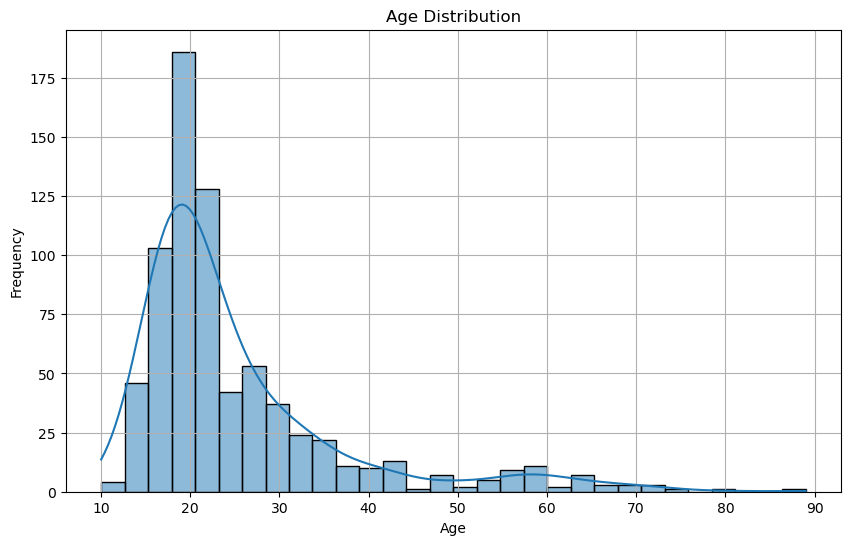

In [5]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(mxmh_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

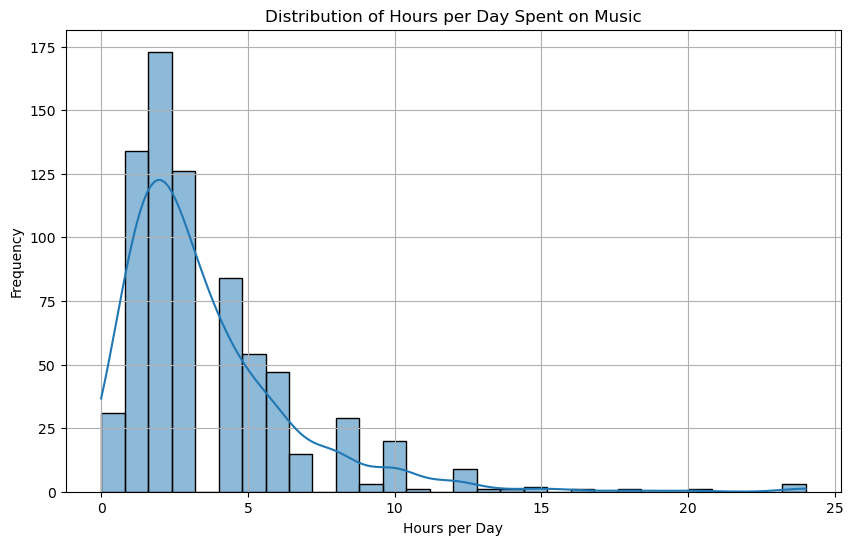

In [6]:
# Hours per day spent on music
plt.figure(figsize=(10, 6))
sns.histplot(mxmh_data['Hours per day'], bins=30, kde=True)
plt.title('Distribution of Hours per Day Spent on Music')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

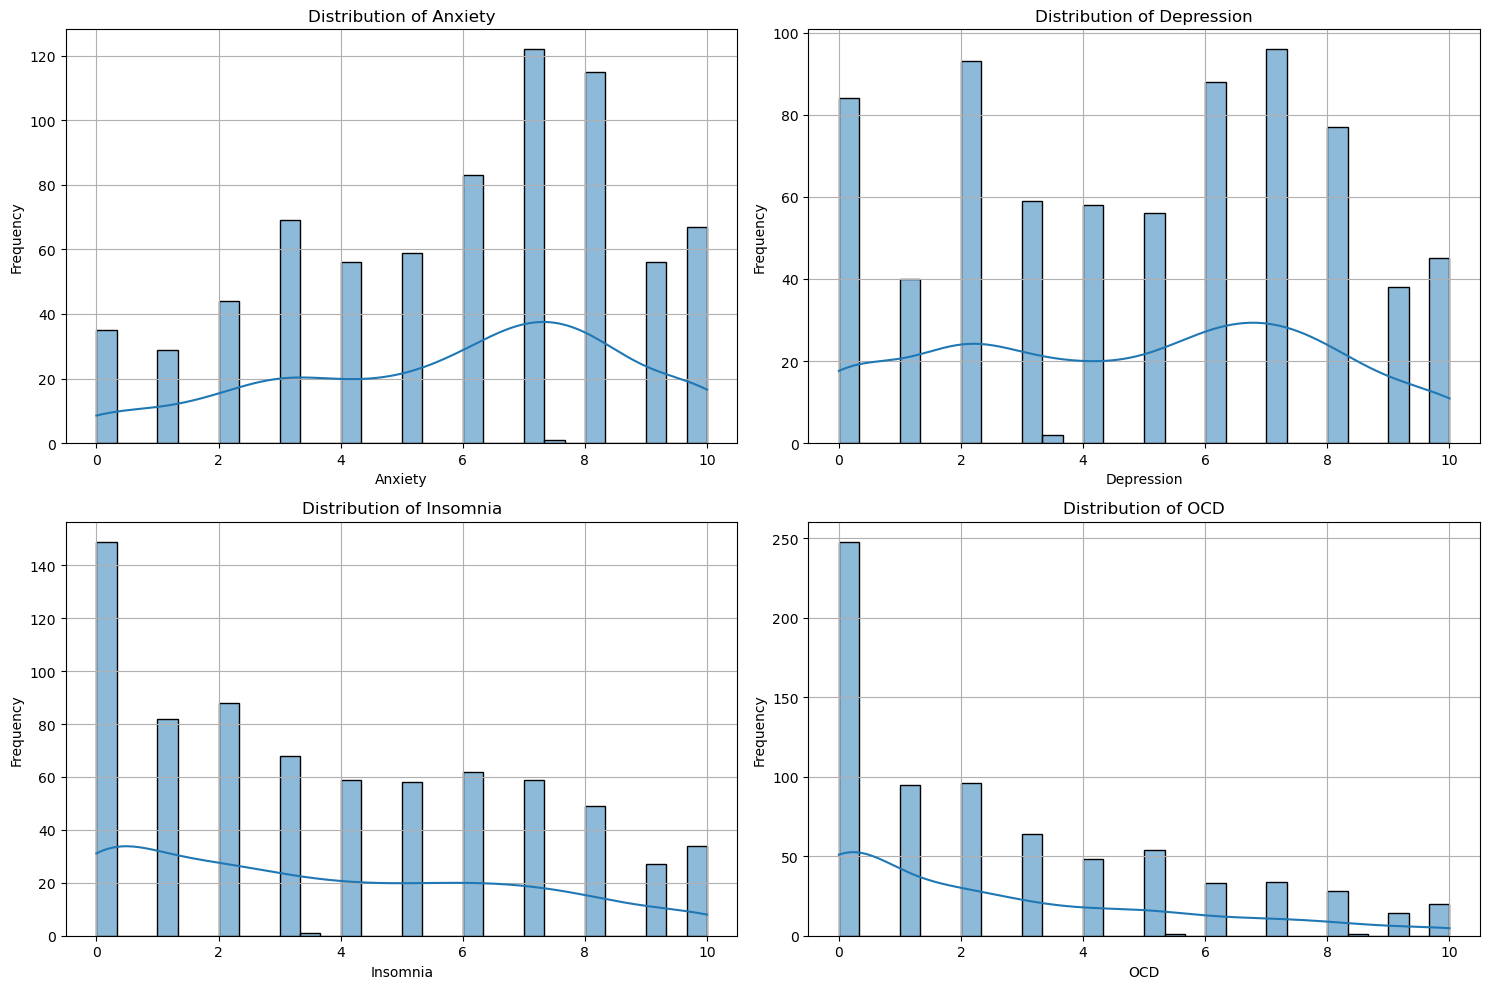

In [7]:
# Mental health indicators distributions
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
plt.figure(figsize=(15, 10))
for i, col in enumerate(mental_health_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(mxmh_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Define transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Fill NaN values with the mean (or median, or mode) of the column
mxmh_data['Age'] = mxmh_data['Age'].fillna(mxmh_data['Age'].mean())
X = mxmh_data.drop(columns=['Age'])
y = mxmh_data['Age']


# Create the preprocessing pipeline for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a Linear Regression pipeline
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression pipeline
linear_pipeline.fit(X_train, y_train)

# Predict and evaluate the Linear Regression model
y_pred = linear_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Model MSE: {mse}')

Linear Regression Model MSE: 122.08689523282088


In [9]:
# Define categorical and numerical columns
categorical_cols = mxmh_data.select_dtypes(include=['object']).columns
numerical_cols = mxmh_data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Anxiety')  # Assuming 'Anxiety' is the target

# Imputing and encoding in a pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the target variable
y = mxmh_data['Anxiety'].values  # Replace 'Anxiety' with your target variable

# Split the dataset into features and target variable, and then into training and testing sets
X = mxmh_data.drop(columns=['Anxiety'])  # Drop the target variable to isolate features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing and training pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Define a hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
best_mse = -grid_search.best_score_
print(f'Best model performance (MSE): {best_mse}')

# Predict and evaluate with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {mse}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=-5.296 total time=   3.6s
[CV 2/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=-5.919 total time=   3.2s
[CV 3/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=-4.454 total time=   3.3s
[CV 4/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=-5.613 total time=   3.4s
[CV 5/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=-5.119 total time=   3.6s
[CV 1/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200;, score=-5.274 total time=   8.2s
[CV 2/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200;, score=-5.868 total time=   7.8s
[